w0=1.558, w1=135.872


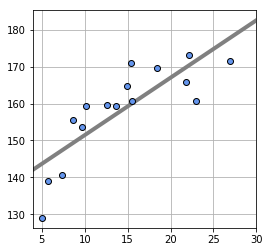

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def mse_line(x, t, w):
    y= w[0] * x + w[1]
    mse=np.mean((y - t)**2)
    return mse

def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0,w1])

def show_line(w):
    xb = np.linspace(X_min, X_max,100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5,.5,.5), linewidth=4)

#X,T
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)

W = fit_line(X,T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0],W[1]))
mse = mse_line(X, T ,W)
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [3]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [38]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))
X2=np.ones((1,16))
XX=np.vstack([X0,X1,X2]).transpose().reshape(16,3)

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


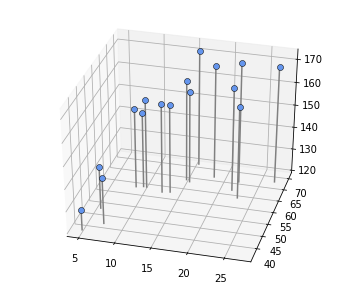

In [39]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
    ax.plot(x0,x1,t,'o',
           color='cornflowerblue', markeredgecolor='black',
           markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)
    
plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
show_data2(ax,X0,X1,T)
plt.show()

SD=12.876 cm


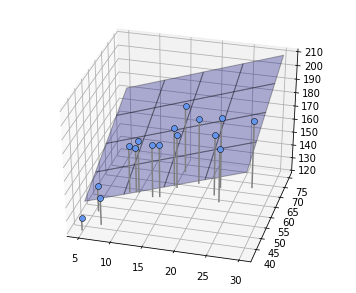

In [40]:
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0,px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')

def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W = [1.5,1,90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

w0=0.5,w1=1.1,w2=89.0
SD=2.546 cm


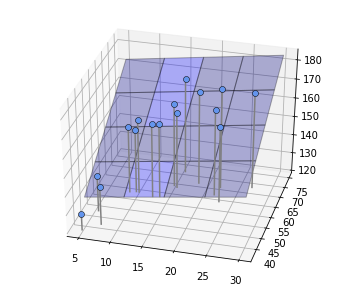

In [43]:
def fit_plane2(xx,t):
    a = np.linalg.inv(xx.transpose().dot(xx))
    b = a.dot(xx.transpose())
    c = b.dot(t)
    return c
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=fit_plane2(XX, T)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_plane(ax,W)
show_data2(ax, X0, X1,T)
mse= mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()